In [1]:
import sympy as sp
from sympy import *
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import *
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
from  matplotlib import *
from math import exp, log, sqrt
from scipy import *
%matplotlib inline
sp.init_printing()
ms, alpha, mh, v, v2, mZp, gchi = sp.symbols('ms alpha mh v v2 mZp gchi')
#v = 246.158

### Lambdas 

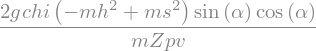

In [2]:
v2 = mZp/(2*gchi)
L1 = (1 / (2*v**2)) * (mh**2 *sp.cos(alpha)**2 + ms**2 * sp.sin(alpha)**2) #<= 4*sp.pi,
L2 = (1 / (2*v2**2)) * (ms**2 *sp.cos(alpha)**2 + mh**2 * sp.sin(alpha)**2)  #<= 4*sp.pi,
L3 = (1 /(v2*v)) *(-mh**2 + ms**2)*sp.sin(alpha)*sp.cos(alpha) # <= 4*sp.pi
L3

### bounds ms < 

(-mh**2*cos(alpha)**2 + 8*pi*v**2)/sin(alpha)**2


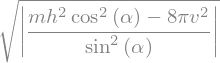

In [3]:
solved_lambda1 = sp.simplify(sp.solve(L1- 4*sp.pi, ms**2)[0])
print(solved_lambda1)
solved_lambda1 = sp.sqrt(abs(solved_lambda1))
#sp.latex(solved_lambda1)
solved_lambda1

(-gchi**2*mh**2*sin(alpha)**2 + 2*pi*mZp**2)/(gchi**2*cos(alpha)**2)


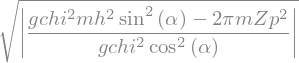

In [4]:
solved_lambda2 = sp.simplify(sp.solve(L2 - 4*sp.pi, ms**2)[0])
print(solved_lambda2)
solved_lambda2 = sp.sqrt(abs(solved_lambda2))
#sp.latex(solved_lambda2)
solved_lambda2

mh**2 + 4*pi*mZp*v/(gchi*sin(2*alpha))


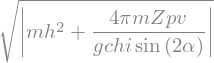

In [5]:
solved_lambda3 = sp.simplify(sp.solve(L3 - 4*sp.pi, ms**2)[0])
print(solved_lambda3)
solved_lambda3 = sp.sqrt(abs(solved_lambda3))
#sp.latex(solved_lambda1)
solved_lambda3

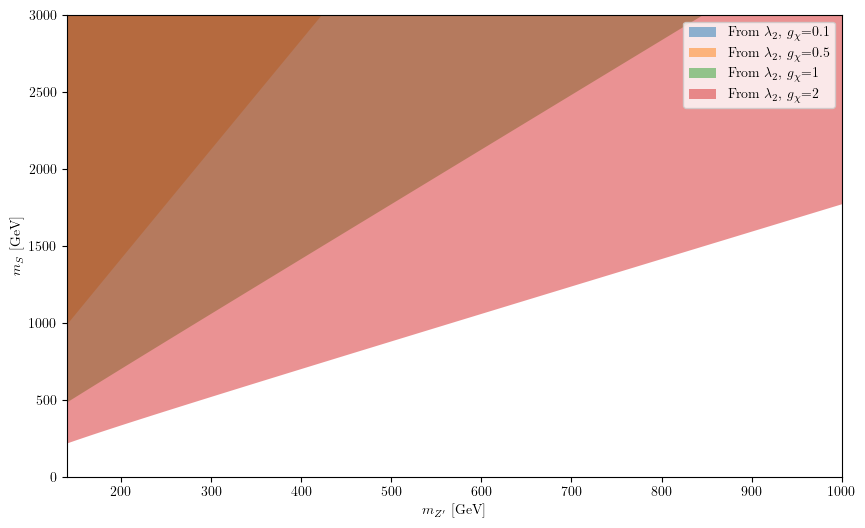

In [6]:
mZp_values = np.linspace(140, 5000, 500)
plt.figure(figsize=(10,6))
gchi_values = [0.1, 0.5, 1, 2]
for g_value in gchi_values:
    ms_equation = solved_lambda2.subs({mh: 125, alpha: sp.pi/4, gchi: g_value})
    ms_values = np.array([float(ms_equation.subs(mZp, val)) for val in mZp_values])
    plt.fill_between(mZp_values, ms_values, 8000, alpha=0.5, label=f'From $\lambda_2$, $g_{{\chi}}$={g_value}')

plt.xlabel(r'$m_{Z^\prime}$ [GeV]')
plt.ylabel(r'$m_{S}$ [GeV]')
plt.ylim(0, 3000)
plt.xlim(140,1000)
plt.legend()
#plt.grid(True)
plt.show()



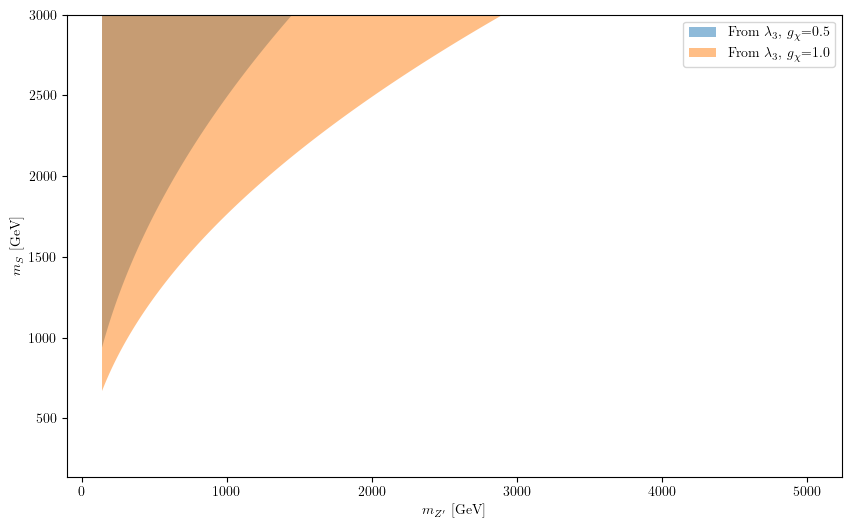

In [7]:
mZp_values = np.linspace(140, 5000, 500)
plt.figure(figsize=(10,6))
gchi_values = [0.5, 1.0]
for g_value in gchi_values:
    ms_equation = solved_lambda3.subs({mh: 125, alpha: sp.pi/4, gchi: g_value, v: 246})
    ms_values = np.array([float(ms_equation.subs(mZp, val)) for val in mZp_values])
    plt.fill_between(mZp_values, ms_values, 10000, alpha=0.5, label=f'From $\lambda_3$, $g_{{\chi}}$={g_value}')

plt.xlabel(r'$m_{Z^\prime}$ [GeV]')
plt.ylabel(r'$m_{S}$ [GeV]')
plt.ylim(140, 3000)
#plt.xlim(140,3000)
plt.legend()
#plt.grid(True)
plt.show()


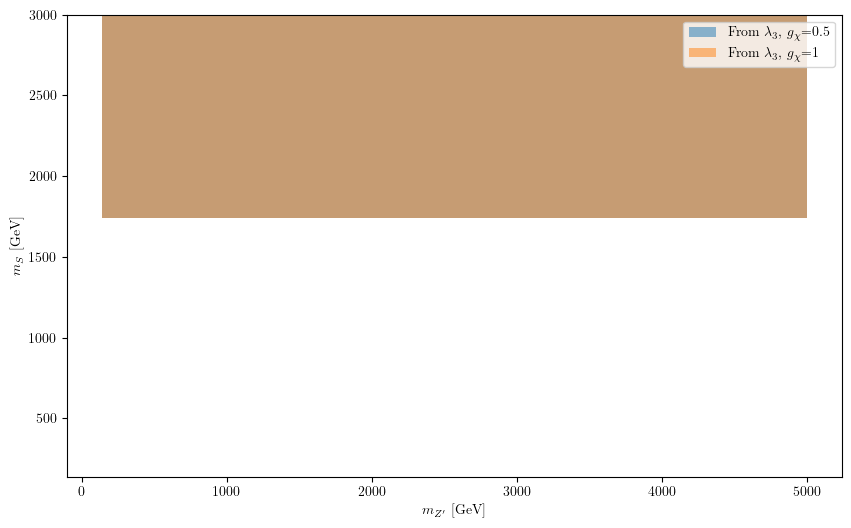

In [8]:
mZp_values = np.linspace(140, 5000, 500)
plt.figure(figsize=(10,6))
gchi_values = [0.5, 1]
for g_value in gchi_values:
    ms_equation = solved_lambda1.subs({mh: 125, alpha: sp.pi/4, gchi: g_value, v: 246}) # Asegúrate de sustituir todas las variables necesarias
    ms_values = np.array([float(ms_equation.subs(mZp, val)) for val in mZp_values])
    plt.fill_between(mZp_values, ms_values, 3000, alpha=0.5, label=f'From $\lambda_3$, $g_{{\chi}}$={g_value}')
plt.xlabel(r'$m_{Z^\prime}$ [GeV]')
plt.ylabel(r'$m_{S}$ [GeV]')
plt.ylim(140, 3000)
#plt.xlim(140,3000)
plt.legend()
#plt.grid(True)
plt.show()

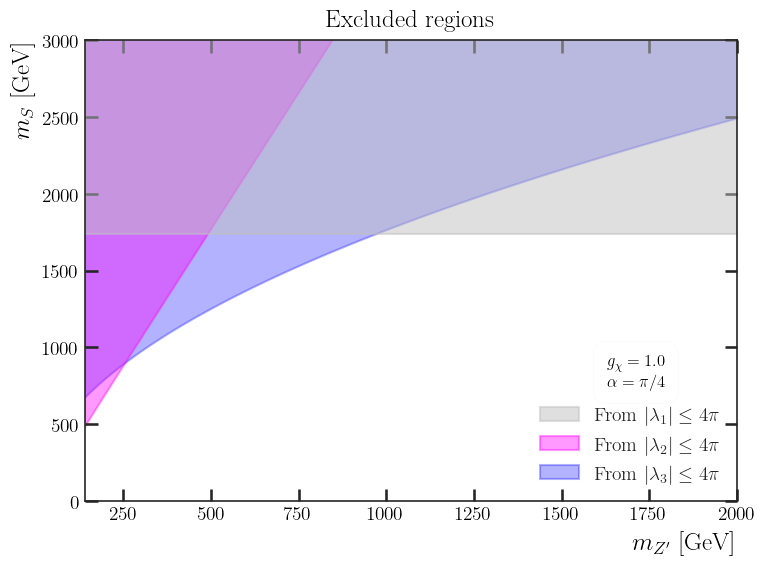

In [9]:
ms_L1 = solved_lambda1.subs({mh: 125, alpha: sp.pi/4, v: 246})
ms_L2 = solved_lambda2.subs({mh: 125, alpha: sp.pi/4, gchi: 1})
ms_L3 = solved_lambda3.subs({mh: 125, alpha: sp.pi/4, gchi: 1, v: 246})
mZp_values = np.linspace(140, 5000, 500)
ms_valuesL1 = np.array([float(ms_L1.subs(mZp, val)) for val in mZp_values])
ms_valuesL2 = np.array([float(ms_L2.subs(mZp, val)) for val in mZp_values])
ms_valuesL3 = np.array([float(ms_L3.subs(mZp, val)) for val in mZp_values])
sns.set_style("white")
sns.set_context("talk")
mpl.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(figsize=(8, 6))
plt.fill_between(mZp_values, ms_valuesL1, 100000, color='silver', alpha=0.5, zorder=1, label='From $|\lambda_1| \leq 4 \pi$')
plt.fill_between(mZp_values, ms_valuesL2, 100000, color='magenta', alpha=0.4, zorder=0.5, label='From $|\lambda_2| \leq 4 \pi$')
plt.fill_between(mZp_values, ms_valuesL3, 100000, color='blue', alpha=0.3, zorder=0.3, label='From $|\lambda_3| \leq 4 \pi$')
ax.set_xlabel(r'$m_{Z^\prime}$ [GeV]', size=18, color='black', labelpad=5, loc="right")
ax.set_ylabel(r'$m_{S}$ [GeV]', size=18, color='black',labelpad=5, loc="top")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.tick_params(axis='both', labelcolor='black', labelsize=14, direction='in', which='both', top=True, right=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_linewidth(1.2)
sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
important_info = (r"$g_{\chi} = 1.0$",
                  r"$\alpha = \pi/4$")
multiline_info = "\n".join(important_info)   
ax.text(0.8, 0.25,  
        multiline_info,
        transform=ax.transAxes,
        fontsize=12,  
        color='black',
        bbox=dict(
            facecolor='white',
            alpha=0.2,
            edgecolor='silver',
            boxstyle='round,pad=0.8',
            linewidth=0.2
        ))
plt.ylim(0, 3000)
plt.xlim(140, 2000)
plt.legend(frameon=False, framealpha=0, fontsize=14, loc='lower right')
#plt.grid(True, which='both', linestyle=':', linewidth=0.3)
plt.title(r'Excluded regions', size=18, color='black', loc="center", pad=10)
plt.tight_layout()
plt.savefig('pertur1.pdf', bbox_inches='tight')
plt.show()

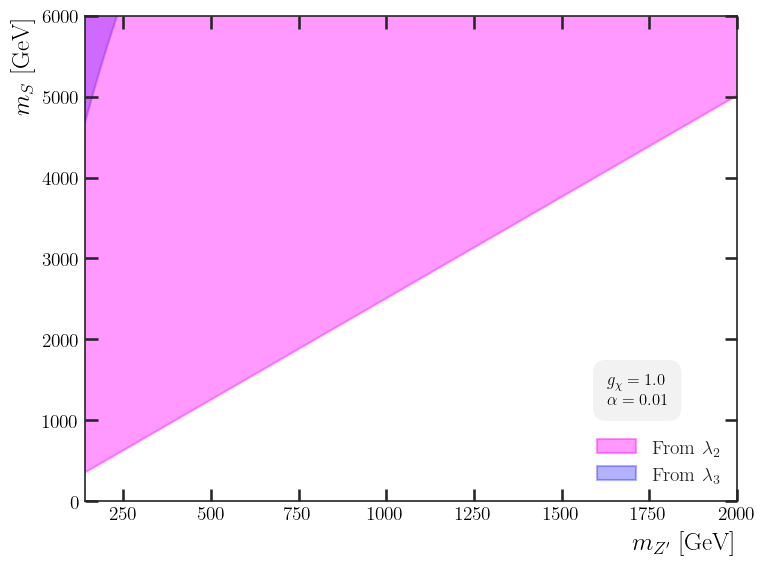

In [10]:
ms_L2 = solved_lambda2.subs({mh: 125, alpha: 0.01, gchi: 1})
ms_L3 = solved_lambda3.subs({mh: 125, alpha: 0.01, gchi: 1, v: 246})
mZp_values = np.linspace(140, 5000, 500)
ms_valuesL2 = np.array([float(ms_L2.subs(mZp, val)) for val in mZp_values])
ms_valuesL3 = np.array([float(ms_L3.subs(mZp, val)) for val in mZp_values])
sns.set_style("white")
sns.set_context("talk")
mpl.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(figsize=(8, 6))
plt.fill_between(mZp_values, ms_valuesL2, 100000, color='magenta', alpha=0.4, zorder=0.5, label='From $\lambda_2$')
plt.fill_between(mZp_values, ms_valuesL3, 100000, color='blue', alpha=0.3, zorder=0.3, label='From $\lambda_3$')
ax.set_xlabel(r'$m_{Z^\prime}$ [GeV]', size=18, color='black', labelpad=5, loc="right")
ax.set_ylabel(r'$m_{S}$ [GeV]', size=18, color='black',labelpad=5, loc="top")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.tick_params(axis='both', labelcolor='black', labelsize=14, direction='in', which='both', top=True, right=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_linewidth(1.2)
sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
important_info = (r"$g_{\chi} = 1.0$",
                  r"$\alpha = 0.01$")
multiline_info = "\n".join(important_info)   
ax.text(0.8, 0.2,  
        multiline_info,
        transform=ax.transAxes,
        fontsize=12,  
        color='black',
        bbox=dict(
            facecolor='silver',
            alpha=0.2,
            edgecolor='silver',
            boxstyle='round,pad=0.8',
            linewidth=0.2
        ))
plt.ylim(0, 6000)
plt.xlim(140, 2000)
plt.legend(frameon=False, framealpha=0, fontsize=14, loc='lower right')
#plt.grid(True, which='both', linestyle=':', linewidth=0.3)
plt.tight_layout()
plt.savefig('pertur2.pdf', bbox_inches='tight')
plt.show()

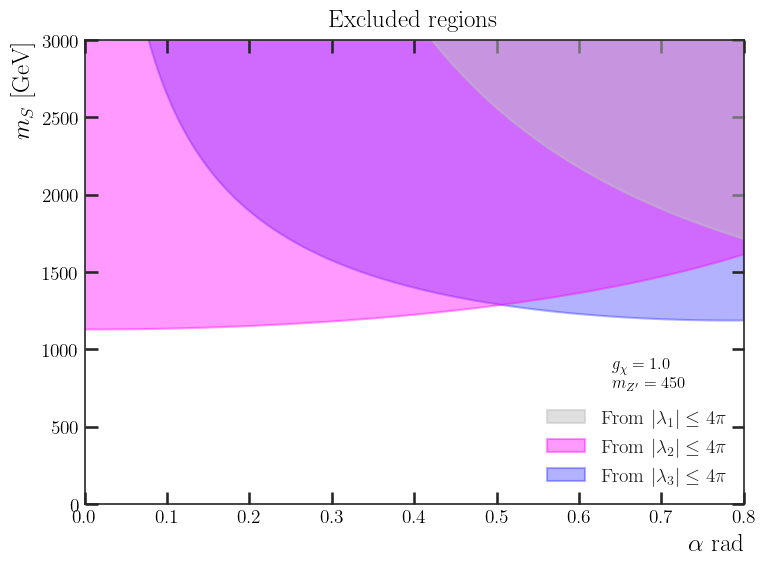

In [11]:
ms_L1 = solved_lambda1.subs({mh: 125, v: 246})
ms_L2 = solved_lambda2.subs({mh: 125, mZp: 450, gchi: 1})
ms_L3 = solved_lambda3.subs({mh: 125, mZp: 450, gchi: 1, v: 246})
alpha_values = np.linspace(-0.78, 0.8, 500)
ms_valuesL1 = np.array([float(ms_L1.subs(alpha, val)) for val in alpha_values])
ms_valuesL2 = np.array([float(ms_L2.subs(alpha, val)) for val in alpha_values])
ms_valuesL3 = np.array([float(ms_L3.subs(alpha, val)) for val in alpha_values])
sns.set_style("white")
sns.set_context("talk")
mpl.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(figsize=(8, 6))
plt.fill_between(alpha_values, ms_valuesL1, 100000, color='silver', alpha=0.5, zorder=1, label='From $|\lambda_1| \leq 4 \pi$')
plt.fill_between(alpha_values, ms_valuesL2, 100000, color='magenta', alpha=0.4, zorder=0.5, label='From $|\lambda_2| \leq 4 \pi$')
plt.fill_between(alpha_values, ms_valuesL3, 100000, color='blue', alpha=0.3, zorder=0.3, label='From $|\lambda_3| \leq 4 \pi$')
ax.set_xlabel(r'$\alpha$ rad', size=18, color='black', labelpad=5, loc="right")
ax.set_ylabel(r'$m_{S}$ [GeV]', size=18, color='black',labelpad=5, loc="top")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.tick_params(axis='both', labelcolor='black', labelsize=14, direction='in', which='both', top=True, right=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_linewidth(1.2)
sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
important_info = (r"$g_{\chi} = 1.0$", r"$m_{Z^\prime}= 450$")
multiline_info = "\n".join(important_info)   
ax.text(0.8, 0.25,  
        multiline_info,
        transform=ax.transAxes,
        fontsize=12,  
        color='black',
        bbox=dict(
            facecolor='white',
            alpha=0.2,
            edgecolor='white',
            boxstyle='round,pad=0.8',
            linewidth=0.2
        ))
plt.ylim(0, 3000)
plt.xlim(0,0.8)
plt.legend(frameon=False, framealpha=0, fontsize=14, loc='lower right')
#plt.grid(True, which='both', linestyle=':', linewidth=0.3)
plt.title(r'Excluded regions', size=18, color='black', loc="center", pad=10)
plt.tight_layout()
plt.savefig('pertur3.pdf', bbox_inches='tight')
plt.show()